# 2021 Stackoverflow Survey insights assessment


1. ***Business Understanding*** - In 2021, StackOverflow collected inputs from individuals via survey around their coding development experience, what are the tools they are working with, what tools they aspire to learn more and how their compensation is looking like with different skillset.
 <br>
2. ***Data Understanding*** - The survey data consists of individual response with ResponseID, Demographics information, Employment status, development experience, Language preference, database preference, platform preference and income and other details. Levering this we can plan to investigate (Click here for <a href=" https://github.com/sidhj24/First-project/blob/b500f31d9b4fcebd232fb657eba4b33bc0dbb471/survey_results_schema.csv"> Data Dictionary</a>) -

    a. How the responses are distributed geographically <br>       
    b. What are the preferred languages, databases, platforms being used today, what people are aspiring to learn <br>    
    c. What are key salary trends by geographies and Education level <br> <br>


3. ***Data Preparation*** - For this assessment we will start with exploring through the data and plan to - <br>

    a. Assess fill rate of various features, and clean it wherever possible <br>
    b. Clean features where data is clumped and then build summaries <br>
    c. Design visuals to help understand the key trends <br>


4. ***Evaluate the Results*** - By building visuals required to review the summaries

In [88]:
# importing all required libraries for the process

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

# Muting all the warnings

import warnings
warnings.filterwarnings('ignore')

# Setting max columns and rows to avoid collapsing 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [89]:
# Reading the Survey data to a dataframe

survey_df = pd.read_csv('survey_results_public.csv')
survey_df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

In [90]:
# looking at numerical feature distribution
survey_df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [91]:
#Checking data type and fill rates for each feature present in data
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [92]:
# Checking for Null rate 
survey_df.isnull().sum()/len(survey_df)*100

# Treating null records accordingly

ResponseId                       0.000000
MainBranch                       0.000000
Employment                       0.139024
Country                          0.000000
US_State                        82.118674
UK_Country                      94.705114
EdLevel                          0.375124
Age1stCode                       0.234902
LearnCode                        0.570477
YearsCode                        2.154868
YearsCodePro                    26.633828
DevType                         20.320234
OrgSize                         27.221084
Currency                        26.796822
CompTotal                       43.452103
CompFreq                        37.499251
LanguageHaveWorkedWith           1.296756
LanguageWantToWorkWith           7.931543
DatabaseHaveWorkedWith          16.650487
DatabaseWantToWorkWith          30.129795
PlatformHaveWorkedWith          37.517228
PlatformWantToWorkWith          50.120447
WebframeHaveWorkedWith          26.045374
WebframeWantToWorkWith          37

In [93]:
#Dropping US states and UK country fields, as we will not be using that for our EDA and it is majorly blank
survey_df.drop(['US_State', 'UK_Country'], axis = 1, inplace = True)
survey_df.head()

,ResponseId,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,NaN,Flask,Flask,Apache Spark;Hadoop;NumPy;Pandas,Hadoop;NumPy;

In [94]:
#Drop the rows with missing salaries and storing in a new df to be used for modelling (if required) 
drop_sal_df = survey_df.dropna(subset=['ConvertedCompYearly'], axis=0)
drop_sal_df.head()

,ResponseId,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
9,10,I am a developer by profession,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,7,4,Data scientist or machine learning specialist,10 to 19 employees,SEK\tSwedish krona,42000.0,Monthly,C++;Python,Haskell;Python,PostgreSQL,NaN,NaN,NaN,NaN,NaN,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;TensorFlow;Torch/PyTorch,Git,Git,IPython/Jupyter;Vim;Visual Studio Code,Emacs;IPython/Jupyter;Vim;Visual Studio Code,Linux-based,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Daily or almost daily,"Yes, somewhat",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,51552.0
11,12,I am a developer by profession,Employed full-time,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12,5,"Developer, back-end",10 to 19 employees,EUR European Euro,43000.0,Yearly,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,C++;Clojure;JavaScript;Node.js;Rust;SQL;TypeSc...,PostgreSQL,MongoDB;PostgreSQL;Redis,AWS,NaN,Express;React.js;Vue.js,Express;Vue.js,NaN,NaN,Git,Git,Atom,Atom,Linux-based,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,Less than once per month or monthly,"Yes, somewhat",Yes,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent;Hispanic or Latin...,None of the above,None of the above,Too long,Easy,46482.0
12,13,I am a developer by profession,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Other (please specify):,15,6,"Developer, desktop or enterprise applications;...","1,000 to 4,999 employees",EUR European Euro,71500.0,Yearly,C;C++;Java;Perl;Ruby,Rust,NaN,NaN,NaN,NaN,Ruby on Rails,NaN,Qt,NumPy;TensorFlow,Git,Docker;Kubernetes,Vim,Vim;Visual Studio Code,Linux-based,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow,Multiple times per day,Yes,Daily or almost daily,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Appropriate in length,Easy,77290.0
16,17,I am a developer by profession,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5 - 10 years,School,6,2,"Developer, full-stack",100 to 499 employees,TRY\tTurkish lira,9000.0,Monthly,C#;HTML/CSS;Java;JavaScript;Node.js,C#;Java;JavaScript;Node.js,Microsoft SQL Server;MongoDB;PostgreSQL,MongoD

In [95]:
# Replacing strings in Years of Coding experience and converting to integer values - capping <1 year to 0 and 50+ years to 50 to make it easy to interpretate

yoc_dict = {'Less than 1 year': 0, 'More than 50 years': 50 }
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'].replace(yoc_dict), errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'].replace(yoc_dict), errors='coerce')
survey_df['YearsCode'].unique()

array([nan,  7., 17.,  3.,  4.,  6., 16., 12., 15., 10., 40.,  9., 26.,
       14., 39., 20.,  8., 19.,  5.,  0., 22.,  2.,  1., 34., 21., 13.,
       25., 24., 30., 31., 18., 38., 50., 27., 41., 42., 35., 23., 28.,
       11., 37., 44., 43., 36., 33., 45., 29., 46., 32., 47., 49., 48.])

In [99]:
# Mean function
fill_mean = lambda col: col.fillna(col.mean())

# Fill the Nulls with mean values
survey_df['YearsCode'] = survey_df['YearsCode'].fillna(survey_df['YearsCode'].mean())
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].fillna(survey_df['YearsCodePro'].mean())

In [101]:
# Checking for Null rate 
survey_df.isnull().sum()/len(survey_df)*100

ResponseId                       0.000000
MainBranch                       0.000000
Employment                       0.139024
Country                          0.000000
EdLevel                          0.375124
Age1stCode                       0.234902
LearnCode                        0.570477
YearsCode                        0.000000
YearsCodePro                     0.000000
DevType                         20.320234
OrgSize                         27.221084
Currency                        26.796822
CompTotal                       43.452103
CompFreq                        37.499251
LanguageHaveWorkedWith           1.296756
LanguageWantToWorkWith           7.931543
DatabaseHaveWorkedWith          16.650487
DatabaseWantToWorkWith          30.129795
PlatformHaveWorkedWith          37.517228
PlatformWantToWorkWith          50.120447
WebframeHaveWorkedWith          26.045374
WebframeWantToWorkWith          37.565167
MiscTechHaveWorkedWith          43.605508
MiscTechWantToWorkWith          54

In [102]:
# Dropping records where 'Employment', 'EdLevel', 'LearnCode', 'Age1stCode' are Null as they have very small proportion of such records
survey_df.dropna(subset = ['Employment', 'EdLevel', 'LearnCode', 'Age1stCode'], axis = 0, inplace = True)
survey_df.isnull().sum()/len(survey_df)*100

ResponseId                       0.000000
MainBranch                       0.000000
Employment                       0.000000
Country                          0.000000
EdLevel                          0.000000
Age1stCode                       0.000000
LearnCode                        0.000000
YearsCode                        0.000000
YearsCodePro                     0.000000
DevType                         19.954970
OrgSize                         26.908039
Currency                        26.604205
CompTotal                       43.106850
CompFreq                        37.186331
LanguageHaveWorkedWith           1.204440
LanguageWantToWorkWith           7.793151
DatabaseHaveWorkedWith          16.455436
DatabaseWantToWorkWith          29.918534
PlatformHaveWorkedWith          37.318275
PlatformWantToWorkWith          49.917081
WebframeHaveWorkedWith          25.874278
WebframeWantToWorkWith          37.403009
MiscTechHaveWorkedWith          43.476050
MiscTechWantToWorkWith          54

# What are key questions to be addressed here 

1. What are key languages People generally are aware of & what they aspire to learn?
2. Which language related skills is paying high salaries
3. What other techs & languages are popular across geographies


In [77]:
# Listing unique values present in relevant data features in the survey data

Code_vals = ['Coding Bootcamp', 'Other online resources (ex: videos, blogs, etc)',
             'Friend or family member', 'School', 'Other (please specify):', 'Colleague',
             'Online Courses or Certification', 'Online Forum', 'Books / Physical media']

Lang_vals = ['C++', 'JavaScript', 'Assembly', 'Bash/Shell', 'C', 'HTML/CSS', 'C#', 'Java', 'Python', 'Delphi',
             'Go', 'PowerShell','R', 'Kotlin', 'Dart', 'Perl', 'Scala', 'APL', 'SQL', 'Matlab', 'Groovy',
             'Haskell', 'Swift', 'PHP', 'Objective-C', 'LISP', 'Elixir', 'Clojure', 'Node.js', 'Crystal', 'Julia',
             'Erlang', 'VBA', 'Ruby', 'Rust', 'TypeScript', 'F#', 'COBOL']

Db_vals = ['PostgreSQL', 'SQLite', 'Elasticsearch', 'MySQL', 'Microsoft SQL Server', 'MariaDB', 'DynamoDB',
             'MongoDB', 'Couchbase', 'Firebase', 'Oracle', 'Cassandra', 'IBM DB2', 'Redis']

Plat_vals = ['Heroku', 'AWS', 'Microsoft Azure', 'Google Cloud Platform', 'DigitalOcean', 'IBM Cloud or Watson',
             'Oracle Cloud Infrastructure']

In [78]:
# Setting up functions to segregate information from LearnCode, Language, Database and Platform associated fields for cleaner visuals

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

# Setting up functions plot trends for LearnCode, Language, Database and Platform associated fields for cleaner visuals

def clean_and_plot(df, title, list_val, df_col, plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df[df_col].value_counts().reset_index()
    study.rename(columns={'index': 'method', df_col: 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', list_val)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None, ylabel = '% Respondants', figsize=[10,5])
        plt.title(title);   
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df    

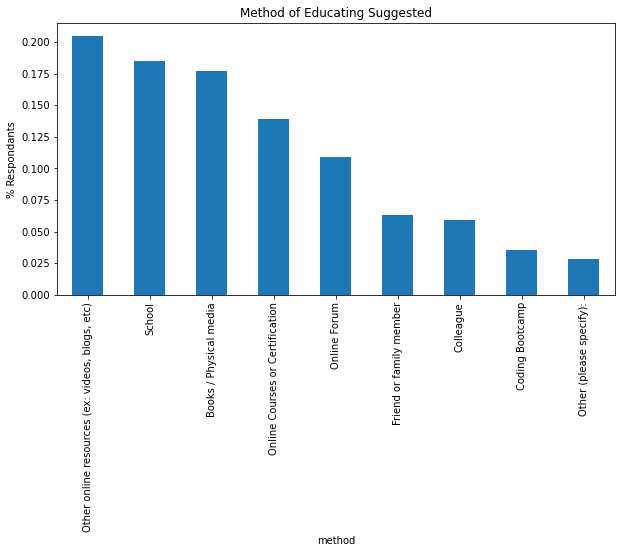

In [79]:
# plotting how individuals are currently learning coding
code_df = clean_and_plot(survey_df, 'Method of Educating Suggested', Code_vals, 'LearnCode' )

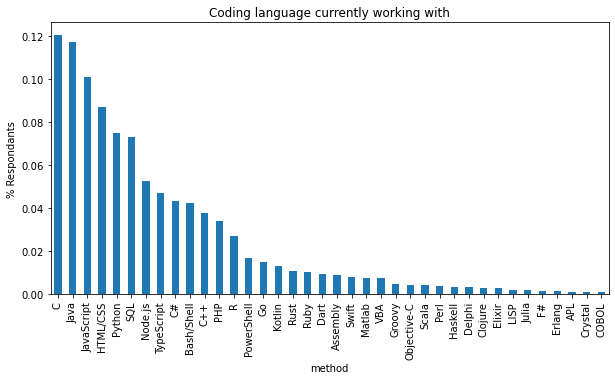

In [80]:
# assessing what language is currently folks are working with majorly
lang_df = clean_and_plot(survey_df, 'Coding language currently working with', Lang_vals, 'LanguageHaveWorkedWith' )

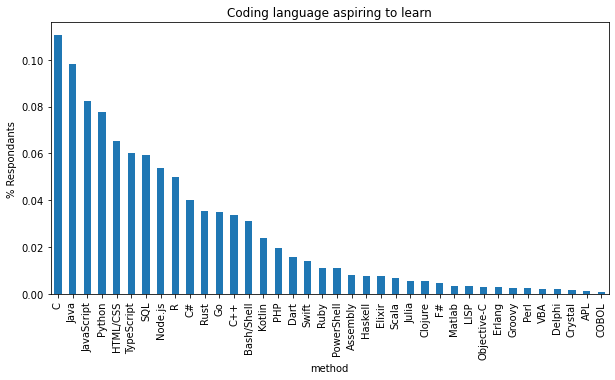

In [81]:
# assessing what language individuals are aspiring to learn
lang_new_df = clean_and_plot(survey_df, 'Coding language aspiring to learn', Lang_vals, 'LanguageWantToWorkWith' )

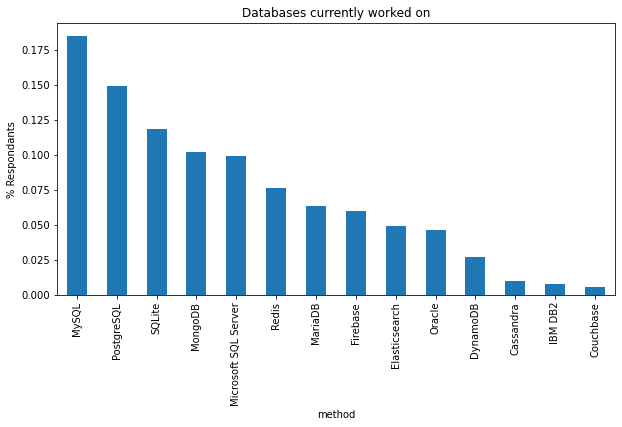

In [82]:
# assessing what Databases individuals are currently working on 
DB_df = clean_and_plot(survey_df, 'Databases currently worked on', Db_vals, 'DatabaseHaveWorkedWith' )

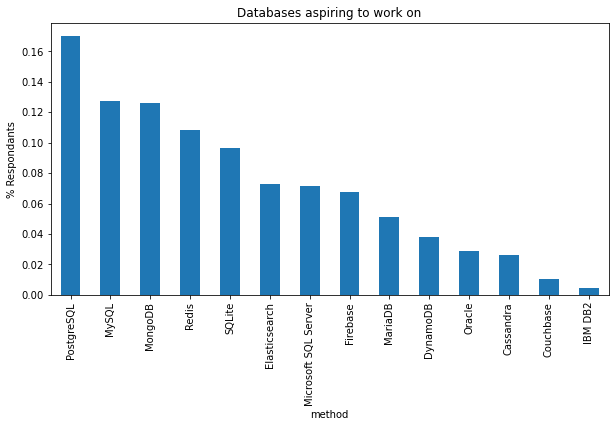

In [83]:
# assessing what Databases individuals are aspiring to work on
DB_new_df = clean_and_plot(survey_df, 'Databases aspiring to work on', Db_vals, 'DatabaseWantToWorkWith' )

In [84]:
# Distribution of Average salary by Age

survey_df.groupby(by='Age')['ConvertedCompYearly'].mean().reset_index().sort_values('ConvertedCompYearly', ascending= True)

,Age,ConvertedCompYearly
7,Under 18 years old,36009.600000
0,18-24 years old,68313.210669
1,25-34 years old,104855.099340
6,Prefer not to say,132552.093750
5,65 years or older,143934.040268
3,45-54 years old,155980.605307
2,35-44 years old,158635.029452
4,55-64 years old,209502.613346


In [85]:
survey_df.head()

,ResponseId,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,0,0,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,0,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",0,0,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,NaN,Flask,Flask,Apache Spark;Hadoop;NumPy;Pandas,Hadoop;NumPy;Pandas,Docker;Git;Kubernetes;Yarn,Docker;Git;Kubernetes;Yarn,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim;Vis...,Linux-based,Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",No,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
5,6,I am a student who is learning to code,"Student, part-time",United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",0,0,Na

In [86]:
# Distribution of Average salary by Country

survey_df.groupby(by='Country')['ConvertedCompYearly'].mean().reset_index().sort_values('ConvertedCompYearly', ascending= False)

# There are some entries from Afganistan and North Korea in high salary, which may not be correct data

,Country,ConvertedCompYearly
0,Afghanistan,2.794748e+06
139,San Marino,5.967000e+05
173,United States of America,2.633738e+05
118,North Korea,2.400000e+05
117,Nomadic,2.154913e+05
27,Cambodia,2.002134e+05
73,Ireland,1.933803e+05
15,Belgium,1.807789e+05
7,Australia,1.606034e+05
156,Switzerland,1.582703e+05


In [87]:
# Distribution of Average salary by Education level

x=survey_df.groupby(by='EdLevel')['ConvertedCompYearly'].mean().reset_index().sort_values('ConvertedCompYearly', ascending= False)
y=survey_df.groupby(by='EdLevel')['ResponseId'].count().reset_index()
y=y.merge(x, how = 'left')
y.sort_values('ConvertedCompYearly', ascending= False)
# There are some individuals with primary/elementary earning the highest salaries

,EdLevel,ResponseId,ConvertedCompYearly
4,Primary/elementary school,2430,283884.040486
3,"Other doctoral degree (Ph.D., Ed.D., etc.)",2556,128200.568465
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35171,125782.871484
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17416,117800.861137
0,"Associate degree (A.A., A.S., etc.)",2219,107530.457823
7,Some college/university study without earning ...,10543,106435.631117
5,"Professional degree (JD, MD, etc.)",1246,87515.578616
6,"Secondary school (e.g. American high school, G...",9459,78566.850246
8,Something else,1571,75827.552521
